<a href="https://colab.research.google.com/github/GrTravis2/AgAid_Hackathon_25/blob/main/AgAID_Hackathon_25_Team_13_Crop_Residue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris


In [225]:
"""
X, y = load_iris(return_X_y=True)

print(X)
type(X)
"""

df = pd.read_csv("data.csv",
                 header=0,
                 usecols= [
                     "y",
                     "x",
                     "red",
                     "green",
                     "blue",
                     "location",
                     "residue",
                 ],
                 dtype= {
                     "y" : int,
                     "x" : int,
                     "red" : int,
                     "blue" : int,
                     "green" : int,
                     "location": int,
                     "resdiue" : bool
                 },
                #nrows=1000
                 )
df

,y,x,red,green,blue,location,residue
0,0,0,105,101,92,0,False
1,0,1,91,86,80,0,False
2,0,2,57,52,48,0,False
3,0,3,67,62,59,0,True
4,0,4,50,44,44,0,True
...,...,...,...,...,...,...,...
262139,511,507,255,253,232,0,True
262140,511,508,249,248,227,0,False
262141,511,509,250,249,228,0,False
262142,511,510,202,204,182,0,False


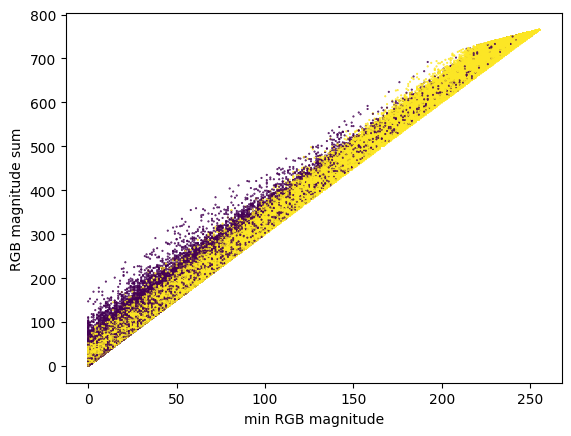

In [226]:
df["avg_color"] = df[["red", "green", "blue"]].mean(axis=1)
df["mag"] = df[["red", "green", "blue"]].prod(axis=1)
df["min"] = df[["red", "green", "blue"]].min(axis=1)
df["sum"] = df[["red", "green", "blue"]].sum(axis=1)
plt.scatter(df["min"], df["sum"], s=0.25, c=df["residue"])
plt.xlabel("min RGB magnitude")
plt.ylabel("RGB magnitude sum")
plt.show()

In [227]:
y = df["residue"].apply(lambda x: 1 if x == True else 0).to_numpy()          # labels
X = df[["min", "sum", "avg_color", "mag"]].to_numpy() # data set

print(X)

[[9.20000000e+01 2.98000000e+02 9.93333333e+01 9.75660000e+05]
 [8.00000000e+01 2.57000000e+02 8.56666667e+01 6.26080000e+05]
 [4.80000000e+01 1.57000000e+02 5.23333333e+01 1.42272000e+05]
 ...
 [2.28000000e+02 7.27000000e+02 2.42333333e+02 1.41930000e+07]
 [1.82000000e+02 5.88000000e+02 1.96000000e+02 7.49985600e+06]
 [1.74000000e+02 5.64000000e+02 1.88000000e+02 6.61617600e+06]]


In [228]:
X2, y2 = load_iris(return_X_y=True)

print(X2)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [233]:
"""from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(projection='3d')

for grp_name, grp_idx in df.groupby(["residue"]).groups.items():
    y = df.iloc[grp_idx,2]
    x = df.iloc[grp_idx,3]
    z = df.iloc[grp_idx,4]
    ax.scatter(x, y, z, label=grp_name)  # this way you can control color/marker/size of each group freely
    #ax.scatter(*df.iloc[grp_idx, [0, 1, 2]].T.values, label=grp_name)  # if you want to do everything in one line, lol

ax.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.show()"""

from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression()),
])

model = GridSearchCV(
    estimator=pipe,
    param_grid=,
    cv=4,
    n_jobs=-1
)
model.fit(X, y)
pd.DataFrame(model.cv_results_)

ValueError: Invalid parameter 'copy_X' for estimator Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].